In [39]:
# Importar bases de dados
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\lucas\OneDrive\Área de Trabalho\seletivo/pseletivo.xlsx')
display(df)

,Unnamed: 0,Date Date,User Phone Number,Brand ID,Brand Name,Store Name,Order Number,Orden revisada (Yes / No),Orden aprobada (Yes / No),Submission Amount,Quantity SKU,Quantity Itens
0,1,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125756.0,Yes,Yes,4.5,66.0,120.0
1,2,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125785.0,Yes,Yes,4.5,35.0,71.0
2,3,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125789.0,Yes,Yes,4.5,33.0,124.0
3,4,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125882.0,Yes,Yes,4.5,18.0,33.0
4,5,2023-02-28,5571981419571,706,Atacado e Varejo Separador,Super Baratão,1125883.0,Yes,Yes,4.5,33.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11930,11931,2022-11-01,5575998128233,706,Atacado e Varejo Separador,Super Baratão,1101322.0,Yes,Yes,4.0,14.0,103.0
11931,11932,2022-11-01,5575998128233,706,Atacado e Varejo Separador,Super Baratão,1101328.0,Yes,Yes,4.0,18.0,41.0
11932,11933,2022-11-01,5579996887969,706,Atacado e Varejo Separador,Mercado Marisol,1100275.0,Yes,Yes,4.0,46.0,68.0
11933,11934,2022-11-01,5579996887969,706,Atacado e Varejo Separador,Mercado Marisol,1101126.0,Yes,Yes,4.0,1.0,10.0


In [40]:
# 1. Quantos pedidos - únicos - a loja Super Baratão teve no mês de Dezembro?
filtro = (df['Store Name'] == 'Super Baratão') & (df['Date Date'].dt.month == 12)
pedidos_dez_sb = df.loc[filtro]

num_pedidos_dez_sb = pedidos_dez_sb['Order Number'].nunique()

print(f"A loja 'Super Baratão' teve {num_pedidos_dez_sb} pedidos únicos no mês de Dezembro.")

A loja 'Super Baratão' teve 1448 pedidos únicos no mês de Dezembro.


In [41]:
# 2. Qual foi o mês com maior percentual de rejeição da loja Mercado Marisol?

df['Rejected'] = df['Orden revisada (Yes / No)'] == 'Yes'

filtro = df['Store Name'] == 'Mercado Marisol'
pedidos_mm = df.loc[filtro]

rejeicao_por_mes = pedidos_mm.groupby(pedidos_mm['Date Date'].dt.month)['Rejected'].mean()

mes_max_rejeicao = rejeicao_por_mes.idxmax()

print(f"O mês com maior percentual de rejeição da loja 'Mercado Marisol' foi o mês {mes_max_rejeicao}.")


O mês com maior percentual de rejeição da loja 'Mercado Marisol' foi o mês 1.


In [42]:
# 3-Quantos usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro?
filtro = (df['Store Name'] == 'Mercado Preço Baixo') & (df['Date Date'].dt.month == 12)
pedidos_mpbd = df.loc[filtro]

pedidos_por_usuario = pedidos_mpbd['User Phone Number'].value_counts().to_frame().rename(columns={'User Phone Number': 'Quantidade'})

pedidos_por_usuario.style.format({'Quantidade': '{:.0f}'})

total_pedidos = pedidos_por_usuario['Quantidade'].sum()

print("Número total de pedidos na loja Mercado Preço Baixo no mês de dezembro:", total_pedidos)


Número total de pedidos na loja Mercado Preço Baixo no mês de dezembro: 1010


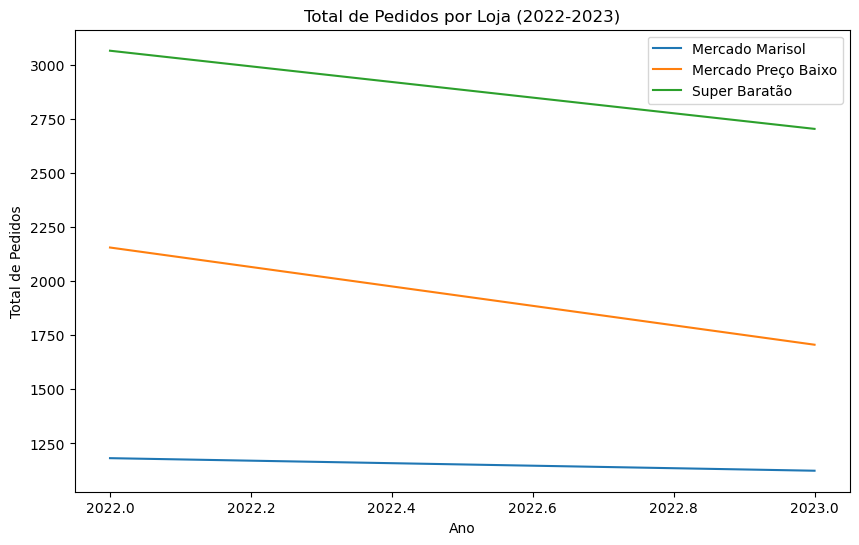

In [43]:
# 4. Construa um gráfico com o total de pedidos de 2022 e 2023. O gráfico deve exibir o total de tarefas de cada loja individualmente.

pedidos_2022_2023 = df[df['Date Date'].dt.year.isin([2022, 2023])]

pedidos_por_loja_ano = pedidos_2022_2023.groupby(['Store Name', pedidos_2022_2023['Date Date'].dt.year])['Order Number'].count()

fig, ax = plt.subplots(figsize=(10, 6))

for loja in pedidos_por_loja_ano.index.levels[0]:
    pedidos = pedidos_por_loja_ano.loc[loja]
    ax.plot(pedidos.index, pedidos.values, label=loja)

ax.set_xlabel('Ano')
ax.set_ylabel('Total de Pedidos')
ax.set_title('Total de Pedidos por Loja (2022-2023)')
ax.legend()

plt.show()

In [34]:
# 5. Identifique o % de variação de pedidos - únicos - por loja no período ano contra ano.

df_ano_anterior = df.groupby(['Store Name', 'Order Number']).filter(lambda x: len(x) == 1 and x['Date Date'].dt.year == 2022)
df_ano_atual = df.groupby(['Store Name', 'Order Number']).filter(lambda x: len(x) == 1 and x['Date Date'].dt.year == 2023)


media_pedidos_ano_anterior = df_ano_anterior.groupby('Store Name').size().mean()
media_pedidos_ano_atual = df_ano_atual.groupby('Store Name').size().mean()


variacao_percentual = ((media_pedidos_ano_atual - media_pedidos_ano_anterior) / media_pedidos_ano_anterior) * 100

print(f'Variação percentual de pedidos únicos por loja no período ano contra ano: {variacao_percentual:.2f}%')


Variação percentual de pedidos únicos por loja no período ano contra ano: -6.41%
